<a href="https://colab.research.google.com/github/armita-jamshidi/user_prediction_model/blob/main/Quantitative_user_research_1_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#BLOCK 1: Google Authentication, and iterating through each question and answer choice
from google.colab import auth
auth.authenticate_user()
import gspread
from google.auth import default
creds, _ = default()
#Authorizing account
gc = gspread.authorize(creds)
#Opening sheet
worksheet = gc.open('Copy of Samphire Menstrual Health Study').sheet1
# get_all_values gives a list of rows.
rows = worksheet.get_all_values()

# Convert to a DataFrame and render.
import pandas as pd
import numpy as np
df = pd.DataFrame.from_records(rows)

#Number of respondents (number of rows)
num_responses = len(df)
#number of questions (number of columns)
num_questions = df.iloc[1].count()


#For each question in the dataset -
for q in range(num_questions):
  the_c = df.iloc[:, q]
  counts = the_c.value_counts().keys().tolist()
  values = the_c.value_counts().tolist()
  #For each response, print out percentage -

  for a in range(len(values)):
    percentage = (values[a]/num_responses)*100
    #worksheet.update_cell(q, a, ("The number of users who responded with answer choice " + str(counts[a]) + " is " + str(percentage)))
    #print(str(counts[a]) + "# Responses is " + str(percentage))




33

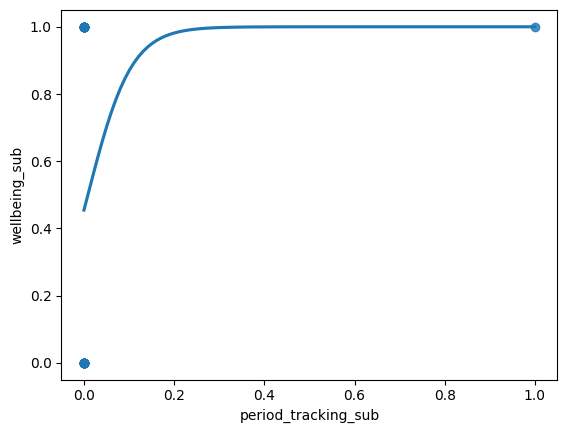

In [ ]:
#BLOCK 2 - testing the relationship between user buying a wellness subscription
#and the user buying a period tracking subscription

from pandas.core.frame import DataFrame
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import accuracy_score

#preprocessing
df = pd.read_csv('data.csv')

#binary Log. Regression - Paid mobile app subscription vs. Paid period tracking app subscription
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

#PREPROCESSING
#deleting rows with no answer
df['wellbeing_sub'].replace('', np.nan, inplace=True)
df.dropna(subset=['wellbeing_sub'], inplace=True)

df['period_tracking_sub'].replace('', np.nan, inplace=True)
df.dropna(subset=['period_tracking_sub'], inplace=True)

#replacing yes' with 1's and no's with 0's
df['wellbeing_sub'].replace({'No, I use free versions of the apps': 0, 'Yes, I pay for subscriptions for one or all selected apps': 1}, inplace=True)
df['wellbeing_sub']

df['period_tracking_sub'].replace({'No, I use free versions of the apps': 0, 'Yes, I pay for subscriptions for one or all selected apps': 1}, inplace=True)
df['period_tracking_sub']

X = df[['wellbeing_sub']]
y = df['period_tracking_sub']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

logreg = LogisticRegression()
logreg.fit(X, y)

y_pred = logreg.predict(X_test)
score = accuracy_score(y_test, y_pred)

# Plotting logreg curve
x = df['wellbeing_sub']
#sns.regplot(x=x, y=y, data=df, logistic=True, ci=None)

#TEST 2 - reverse relationship
y = df[['wellbeing_sub']]
x = df['period_tracking_sub']
sns.regplot(x=x, y=y, data=df, logistic=True, ci=None)

#number of people who responded to each
no_wellbeing = df.loc[(df['period_tracking_sub'] == 0)]
len(no_wellbeing)


32

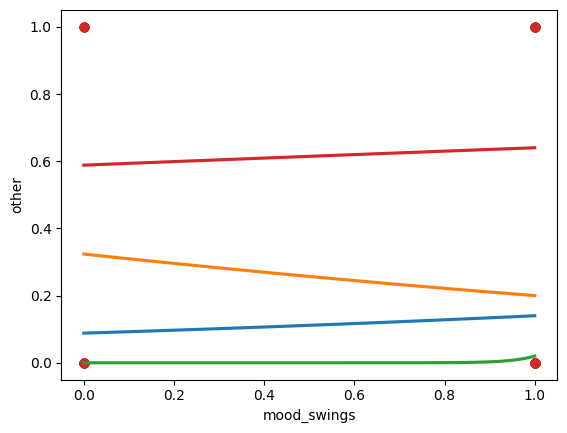

In [ ]:
#BLOCK 3 - testing relationship between having period cramps and buying wearable technology

from pandas.core.frame import DataFrame
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import accuracy_score

#preprocessing
df = pd.read_csv('data.csv')

from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

#PREPROCESSING
#replacing True with 1 and False with 0
df['smart_watch'].replace({'False': 0, 'True': 1}, inplace=True)
df['smart_watch']

df['fitness_tracker'].replace({'False': 0, 'True': 1}, inplace=True)
df['fitness_tracker']

df['jewellery'].replace({'False': 0, 'True': 1}, inplace=True)
df['jewellery']

df['other'].replace({'False': 0, 'True': 1}, inplace=True)
df['other']

#dependent
df['cramps'].replace({'False': 0, 'True': 1}, inplace=True)
df['cramps']

#PLOTTING 1 - CRAMPS VS. SMART WEARABLES
# Plotting logreg curve - cramps vs. smart_watch
x = df['cramps']
y = df['smart_watch']
#sns.regplot(x=x, y=y, data=df, logistic=True, ci=None)

# Plotting logreg curve - cramps vs. fitness_tracker
x = df['cramps']
y = df['fitness_tracker']
#sns.regplot(x=x, y=y, data=df, logistic=True, ci=None)

# Plotting logreg curve - cramps vs. jewellery
x = df['cramps']
y = df['jewellery']
#sns.regplot(x=x, y=y, data=df, logistic=True, ci=None)

# Plotting logreg curve - cramps vs. None of the above
x = df['cramps']
y = df['other']
#sns.regplot(x=x, y=y, data=df, logistic=True, ci=None)

#PLOTTING 2 - MOOD SWINGS VS. SMART WEARABLES
#fitness tracker
x = df['mood_swings']
y = df['fitness_tracker']
sns.regplot(x=x, y=y, data=df, logistic=True, ci=None)

x = df['mood_swings']
y = df['smart_watch']
sns.regplot(x=x, y=y, data=df, logistic=True, ci=None)

x = df['mood_swings']
y = df['jewellery']
sns.regplot(x=x, y=y, data=df, logistic=True, ci=None)

x = df['mood_swings']
y = df['other']
sns.regplot(x=x, y=y, data=df, logistic=True, ci=None)

#number of people who responded to each
no_wellbeing = df.loc[(df['other'] == 0)]
len(no_wellbeing)


In [ ]:
#BLOCK 4 - predicting whether someone has cramps based on which wearable device they have
#Predicting if someone has certain devices, the likelihood that they have cramps
X = df[['smart_watch', 'fitness_tracker', 'jewellery', 'other']]
y = df['cramps']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

logreg = LogisticRegression(class_weight = 'balanced')
logreg.fit(X, y)

#SAMPLE DATA READ
#Obs = pd.read_csv('t_f_cramp_data.csv')
# y_pred = logreg.predict(X_test)

# newData = Obs.values
# y_pred = logreg.predict(newData)
# y_pred

#Sample data without pre-processing
Obs = pd.read_csv('t_f_cramp_data.csv')
Obs['smart_watch'] = Obs['smart_watch'].replace({False: 0, True: 1}, regex=True)
Obs['fitness_tracker'] = Obs['fitness_tracker'].replace({False: 0, True: 1}, regex=True)
Obs['jewellery'] = Obs['jewellery'].replace({False: 0, True: 1}, regex=True)
Obs['other'] = Obs['other'].replace({False: 0, True: 1}, regex=True)

# y_pred = logreg.predict(X_test)

newData = Obs.values
y_pred = logreg.predict(newData)
y_pred

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([ True,  True,  True, False])

In [ ]:
#BLOCK 5 - predicting whether someone has mood swings based on which wearable device they have
#Predicting if someone has certain devices, the likelihood that they have cramps
X = df[['smart_watch', 'fitness_tracker', 'jewellery', 'other']]
y = df['mood_swings']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

logreg = LogisticRegression(class_weight = 'balanced')
logreg.fit(X, y)

#Sample data without pre-processing
#WITHOUT PREPROCESSING THE DATA
Obs = pd.read_csv('t_f_cramp_data2.csv')
Obs['smart_watch'] = Obs['smart_watch'].replace({False: 0, True: 1}, regex=True)
Obs['fitness_tracker'] = Obs['fitness_tracker'].replace({False: 0, True: 1}, regex=True)
Obs['jewellery'] = Obs['jewellery'].replace({False: 0, True: 1}, regex=True)
Obs['other'] = Obs['other'].replace({False: 0, True: 1}, regex=True)

newData = Obs.values
y_pred = logreg.predict(newData)
y_pred


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([False, False,  True,  True])

In [ ]:
#BLOCK 6 - testing if data demonstrate a normal distribution, and if so
#conducting Chi-Squared test to determine if there is a statistically significant relationship
from scipy.stats import ttest_rel
import scipy.stats as sp
import pandas as pd
df = pd.read_csv('data.csv')

df['wellbeing_sub'].replace({'No, I use free versions of the apps': 0, 'Yes, I pay for subscriptions for one or all selected apps': 1}, inplace=True)
df['period_tracking_sub'].replace({'No, I use free versions of the apps': 0, 'Yes, I pay for subscriptions for one or all selected apps': 1}, inplace=True)

df=df.dropna(subset=['wellbeing_sub', 'period_tracking_sub'])
#sp.stats.ttest_ind(df.dropna()['period_tracking_sub'], df.dropna()['wellbeing_sub'])
x = df.query('period_tracking_sub == "Yes, I pay for subscriptions for one or all selected apps"')['wellbeing_sub']
y = df.query('period_tracking_sub == "No, I use free versions of the apps"')['wellbeing_sub']

#wellbeing vs. period tracking - not normally distributed

import math
import numpy as np
from scipy.stats import lognorm
import matplotlib.pyplot as plt

#make this example reproducible
np.random.seed(1)

#generate dataset that contains 1000 log-normal distributed values
lognorm_dataset = lognorm.rvs(s=.5, scale=math.exp(1), size=1000)

#create histogram to visualize wellbeing
wellbeing = df.loc[:,"wellbeing_sub"]
#plt.hist(wellbeing, edgecolor='black', bins=20)

#create histogram to visualize period subscription
p = df.loc[:,"period_tracking_sub"]
#plt.hist(p, edgecolor='black', bins=20)


#chi squared test
from scipy.stats import chisquare, chi2_contingency, chi2

#chisquare(df['wellbeing_sub'].value_counts())
#chisquare(df['period_tracking_sub'].value_counts())

# stat, p, dof, expected = chi2_contingency(df)
# str(p)

#testing if fashion teach and cramps are normally distirbuted
chisquare(df['cramps'].value_counts())
chisquare(df['smart_watch'].value_counts())
chisquare(df['fitness_tracker'].value_counts())
chisquare(df['jewellery'].value_counts())
chisquare(df['other'].value_counts())

#testing normal distribution of other symptoms
#chisquare(df['anxiety'].value_counts())
#chisquare(df['irritability'].value_counts())
#chisquare(df['anger'].value_counts())
#chisquare(df['fog'].value_counts())
#chisquare(df['fatigue'].value_counts())
#chisquare(df['other'].value_counts())

#Chi-Squared test with normally distributed data

#mood swings and smart watch
contingencyTable = pd.crosstab(df['smart_watch'],df['mood_swings'])
#print(contingencyTable)
stat, p, dof, expected = chi2_contingency(contingencyTable)
critical = chi2.ppf(0.95, dof)

# if abs(stat) >= critical:
#     print('Dependent (reject H0)')
# else:
#     print('Independent (fail to reject H0)')

#testing which sources of media are normally distributed
chisquare(df['professionals'].value_counts())
chisquare(df['peers'].value_counts())
chisquare(df['blogs'].value_counts())
chisquare(df['papers'].value_counts())
chisquare(df['apps'].value_counts())
chisquare(df['books'].value_counts())
chisquare(df['na'].value_counts())
chisquare(df['breast_tenderness'].value_counts())


#Chi-test with media
# contingencyTable = pd.crosstab(df['fog'],df['books'])
# print(contingencyTable)
# stat, p, dof, expected = chi2_contingency(contingencyTable)
# critical = chi2.ppf(0.95, dof)

# print(str(stat))
# print(str(critical))
# if abs(stat) >= critical:
#      print('Dependent (reject H0)')
# else:
#      print('Independent (fail to reject H0)')


FileNotFoundError: ignored

In [ ]:
#BLOCK 7 Statistically significant data -
x = df['fog']
y = df['books']
#sns.regplot(x=x, y=y, data=df, logistic=True, ci=None)


KeyError: ignored

<Axes: xlabel='c_and_f', ylabel='other'>

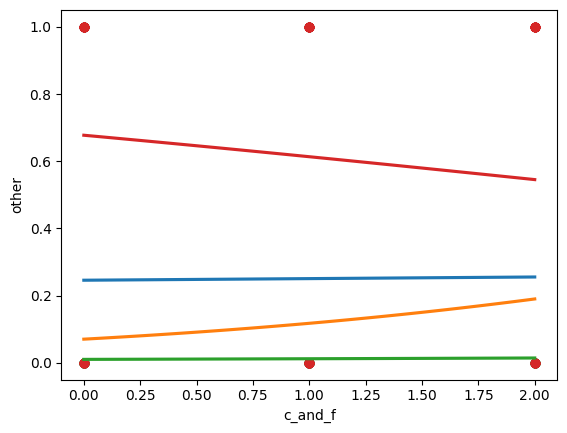

In [ ]:
#BLOCK 8 - strong correlations and wearables

from pandas.core.frame import DataFrame
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import accuracy_score

#preprocessing
df = pd.read_csv('irritability_anger_table_csv.csv')

from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

#PREPROCESSING
#replacing True with 1 and False with 0
#dependent
df['smart_watch'].replace({'False': 0, 'True': 1}, inplace=True)
df['fitness_tracker'].replace({'False': 0, 'True': 1}, inplace=True)
df['jewellery'].replace({'False': 0, 'True': 1}, inplace=True)
df['other'].replace({'False': 0, 'True': 1}, inplace=True)

#PLOTTING 1 - IRRITABILITY & ANGER VS. SMART WATCH
# Plotting logreg curve - cramps vs. smart_watch

# x = df['i_and_a']
# y = df['smart_watch']
# sns.regplot(x=x, y=y, data=df, logistic=True, ci=None)

# x = df['i_and_a']
# y = df['fitness_tracker']
# sns.regplot(x=x, y=y, data=df, logistic=True, ci=None)

# x = df['i_and_a']
# y = df['jewellery']
# sns.regplot(x=x, y=y, data=df, logistic=True, ci=None)

# x = df['i_and_a']
# y = df['other']
# sns.regplot(x=x, y=y, data=df, logistic=True, ci=None)

#PLOTTING 2 - BREAST TENDERNESS & LOW MOOD VS. WEARABLES
# Plotting logreg curve - cramps vs. smart_watch

x = df['lm_and_bt']
y = df['smart_watch']
#sns.regplot(x=x, y=y, data=df, logistic=True, ci=None)

# y = df['fitness_tracker']
# sns.regplot(x=x, y=y, data=df, logistic=True, ci=None)

# y = df['jewellery']
# sns.regplot(x=x, y=y, data=df, logistic=True, ci=None)

# y = df['other']
# sns.regplot(x=x, y=y, data=df, logistic=True, ci=None)

#PLOTTING 3 - CRAVINGS AND APPETITE CHANGES & FOG VS. WEARABLES
# Plotting logreg curve

x = df['c_and_f']
y = df['smart_watch']
sns.regplot(x=x, y=y, data=df, logistic=True, ci=None)

y = df['fitness_tracker']
sns.regplot(x=x, y=y, data=df, logistic=True, ci=None)

y = df['jewellery']
sns.regplot(x=x, y=y, data=df, logistic=True, ci=None)

y = df['other']
sns.regplot(x=x, y=y, data=df, logistic=True, ci=None)